In [1]:
import numpy as np
from SuperlatticeTMM.raman import *
from SuperlatticeTMM.structure import StructureOA
import matplotlib.pyplot as plt
from materials import GaAs,AlAs,Air

In [5]:
wl_DBR=900
params = [("GaAs",wl_DBR/4/GaAs.n),("AlAs",wl_DBR/4/AlAs.n)]*8 + [("GaAs",wl_DBR/GaAs.n)] + [("AlAs",wl_DBR/4/AlAs.n),("GaAs",wl_DBR/4/GaAs.n)]*12
params = np.array(params, dtype=[('materials','U10'),('thickness',np.float64)])
params

array([('GaAs',  63.55932203), ('AlAs',  76.01351351),
       ('GaAs',  63.55932203), ('AlAs',  76.01351351),
       ('GaAs',  63.55932203), ('AlAs',  76.01351351),
       ('GaAs',  63.55932203), ('AlAs',  76.01351351),
       ('GaAs',  63.55932203), ('AlAs',  76.01351351),
       ('GaAs',  63.55932203), ('AlAs',  76.01351351),
       ('GaAs',  63.55932203), ('AlAs',  76.01351351),
       ('GaAs',  63.55932203), ('AlAs',  76.01351351),
       ('GaAs', 254.23728814), ('AlAs',  76.01351351),
       ('GaAs',  63.55932203), ('AlAs',  76.01351351),
       ('GaAs',  63.55932203), ('AlAs',  76.01351351),
       ('GaAs',  63.55932203), ('AlAs',  76.01351351),
       ('GaAs',  63.55932203), ('AlAs',  76.01351351),
       ('GaAs',  63.55932203), ('AlAs',  76.01351351),
       ('GaAs',  63.55932203), ('AlAs',  76.01351351),
       ('GaAs',  63.55932203), ('AlAs',  76.01351351),
       ('GaAs',  63.55932203), ('AlAs',  76.01351351),
       ('GaAs',  63.55932203), ('AlAs',  76.01351351),
       ('G

In [6]:
struct = StructureOA(params, alloys=(0,0))

Text(0, 0.5, 'Opt.Reflectivity')

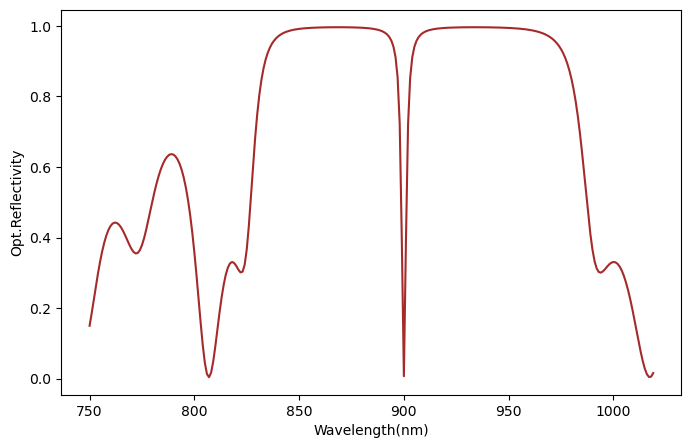

In [7]:
wl_range = np.arange(750,1020,1)
plt.figure(figsize=(8,5))
plt.plot(wl_range,struct.get_optic_refl(wl_range,"Air","GaAs"),c='brown')
plt.xlabel("Wavelength(nm)")
plt.ylabel("Opt.Reflectivity")

In [9]:
struct = StructureOA(params[::-1], alloys=(0,0))

In [33]:
from numpy import linalg as LA
freq_range = np.arange(2,40,1/128)
sts = []
for freq in freq_range:
    struct.calc_complex_Uvectors(freq,"GaAs","Air")
    sts.append((LA.norm(struct.U_vectors[-1])/LA.norm(struct.U_vectors[0]))**4)
    

Text(0.5, 0, 'Frequency(GHz)')

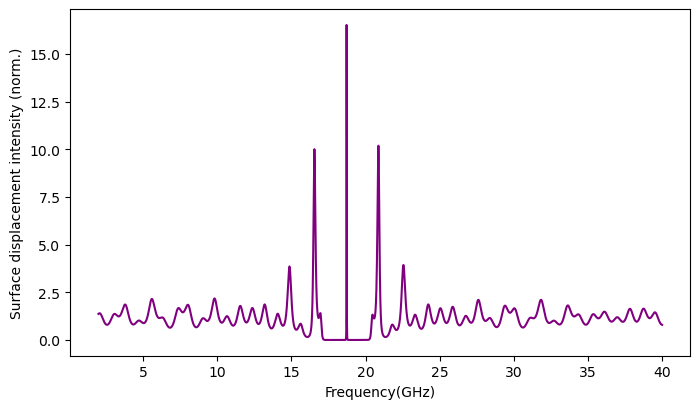

In [36]:
plt.figure(figsize=(8,4.5))
plt.plot(freq_range,sts,c='purple')
plt.ylabel("Surface displacement intensity (norm.)")
plt.xlabel("Frequency(GHz)")

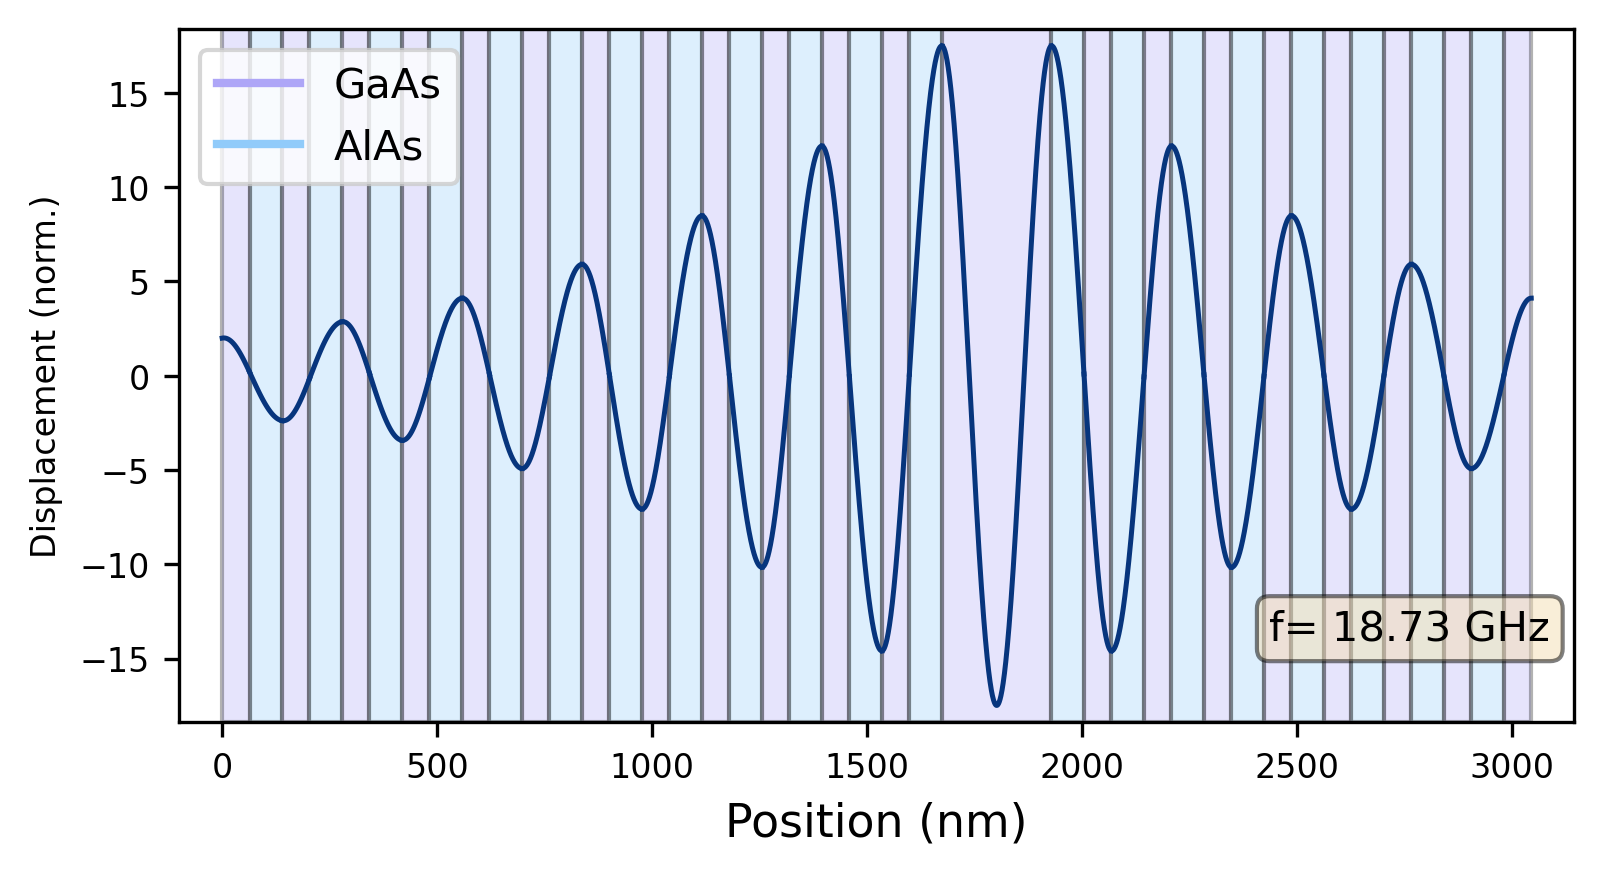

In [41]:
struct.plot_field('acoustic','real',18.73,"GaAs","Air",h=17.5)